最終課題
テーマ「都市部と地方で生徒の点数に差はあるか」
データセットはKaggleの以下のURLよりダウンロードしました。

https://www.kaggle.com/datasets/kwadwoofosu/predict-test-scores-of-students

１.必要なモジュールの読み込み

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.formula.api as smf
import statsmodels.api as sm

%matplotlib inline

２.データの読み込み 

In [2]:
data = pd.read_csv('test_scores.csv')

In [14]:
#dataの最後の５行のみ表示
data.tail()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
2128,ZOWMK,Urban,Public,ZBH,Standard,30.0,T8LSK,Female,Does not qualify,39.0,55.0
2129,ZOWMK,Urban,Public,ZBH,Standard,30.0,VNP26,Female,Qualifies for reduced/free lunch,38.0,46.0
2130,ZOWMK,Urban,Public,ZBH,Standard,30.0,YDR1Z,Female,Qualifies for reduced/free lunch,45.0,51.0
2131,ZOWMK,Urban,Public,ZBH,Standard,30.0,YUEIH,Male,Qualifies for reduced/free lunch,46.0,53.0
2132,ZOWMK,Urban,Public,ZBH,Standard,30.0,ZVCQ8,Male,Qualifies for reduced/free lunch,41.0,48.0


３.データ内容の確認

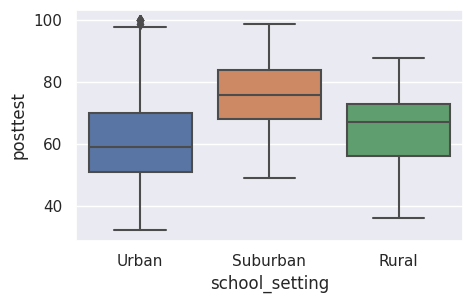

In [6]:
# 箱ひげ図にて学校所在地別のプレテストの成績を表示
f, axes = plt.subplots(figsize=(5,3))

sns.boxplot(x='school_setting', y='posttest', data=data)

４.分散分析

In [8]:
# 各ラインの濃度の平均値を計算し、それぞれを連結して リストとして格納
me_urban = np.mean(data.query('school_setting == "Urban"')['posttest'])
me_suburban = np.mean(data.query('school_setting == "Suburban"')['posttest'])
me_rural = np.mean(data.query('school_setting == "Rural"')['posttest'])

print('Urban:', me_urban)
print('Suburban:', me_suburban)
print('Rural:', me_rural)

list = [me_urban, me_suburban, me_rural]

Urban: 61.74834437086093
Suburban: 76.0376569037657
Rural: 64.05098039215686


In [19]:
#　効果の平方和を求める
mu_n = [61.748]*711 + [76.038]*711 + [64.051]*711

mu_n = np.array(mu_n)

mu_all = np.mean(data['posttest'])
effect = mu_n - mu_all

squares_line = np.sum(effect**2)
squares_line

83774.14169530563

In [21]:
#　誤差を求める
resid = data['posttest']-mu_n

In [22]:
#　誤差の平方和を求める
squares_resid = np.sum(resid**2)
squares_resid

583136.581339

In [23]:
 # 効果の自由度を変数 df_model に格納し、誤差の自由度を変数 df_resid に格納する
df_model = 2   # 学校所在地の自由度 = ３(製造ライン) - 1
df_resid = 2130 # 群内変動の自由度 = (全体の自由度 = ２１３３(全体の数) - 1) - (製造ラインの自由度)

In [24]:
# 効果の分散を求める
variance_model = squares_line
variance_model

83774.14169530563

In [25]:
# 誤差の分散を求める
variance_resid = squares_resid/df_resid
variance_resid

273.77304288215964

In [26]:
# p値を求める
# まずF比を求める
f_ratio = variance_model/variance_resid
f_ratio

305.9985045034715

In [27]:
# p値を求めて、表示する
1-sp.stats.f.cdf(x=f_ratio, dfn=df_model, dfd=df_resid)

1.1102230246251565e-16

5. Statsmodelsによる分散分析

In [28]:
# 最小二乗法を使ってモデルを作成
anova_model = smf.ols('posttest ~ school_setting', data=data).fit()

In [29]:
# Statsmodelsの関数で分散分析を実行し、結果を表示
sm.stats.anova_lm(anova_model, typ=2)

,sum_sq,df,F,PR(>F)
school_setting,87964.439354,2.0,284.64491,2.776785e-110
Residual,329119.280290,2130.0,NaN,NaN


６.結果の解釈

学校の地域によってテストの点数は有意に異なる。